In [143]:
# Import libraries
import pandas as pd
import seaborn as sns
import os, glob
import matplotlib.pyplot as plt

In [144]:
#Dashboard
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 30)
pd.options.display.max_seq_items = 300
#pd.options.display.max_rows = 4000
sns.set(style="white")

In [67]:
# Import data_clean and set id as index
data = pd.read_csv("data_clean.csv")
data.set_index('id', inplace=True)

# Feature Engineering

## Occupancy

Calculation of **occupancy rate** is inspired by the **San Francisco model**, which is also applied by [Inside AirBnB](http://insideairbnb.com/about.html):

- (**A**) Determine the **average length of stay for Berlin** (assumed 3 days in most cities)
- (**B**) Calculate **reviews in last two years**
- (**C**) Determine **active months in last two years** from price
- (**D**) Estimate **# of bookings in last two years** by dividing (**B**) through a assumed 50% review rate (i.e. one review corresponds to two bookings)
- (**E**) **Occupancy rate** = (**D**)x(**A**) / ((**C**)/24 x 365)

Read more about the core idea behind the calculations of the model [here](https://sfbos.org/sites/default/files/FileCenter/Documents/52601-BLA.ShortTermRentals.051315.pdf). Assumptions were adapted for the purpose of this analysis, mainly at the core idea of considering only the two most recent years.

(**A**) Determine the **average length of stay for Berlin** (assumed 3 days in most cities)

For the purpose of this model, **4 nights** are assumed as average length of stay in Berlin
- Back in 2016, [4.6](https://www.airbnbcitizen.com/wp-content/uploads/2016/04/airbnb-community-berlin-en.pdf) has been reported as the average length of stay
- Inside AirBnB uses 3 nights for cities where no current data is available

(**B**) Calculate **reviews in last two years**

In [68]:
# Calculate occupancy


In [69]:
# Split occupancy into 5 classes (TARGET)


In [70]:
# Categorize listings by "state" (basic, moderate, luxurious)

## Seasonality

**Create time series dataset to calculate weighted avg price and seasonal weight (2 yrs from Apr'18 - Mar'20)**

In [109]:
# Import Airbnb listing data for the time period 04/2018-03/2020 (2 years)

# Save "price" column of data (02/2020) as "data_ts"
data_ts = pd.DataFrame(data.price.copy())

# Rename "price" column to reflect the date "2020-02"
data_ts.rename(columns={"price": "2020-02"}, inplace=True)

# Import other files from 2 year period and add price column (renamed to reflect the date) to "data_ts"
all_files = glob.glob(os.path.join("data/timeseries", "*.csv.gz"))         # save paths of files as list
for f in all_files:                                                        # loop through all paths
    df_temp = pd.read_csv(f, sep=',')                                      # import each file from path and save as temporary dataframe
    df_temp.drop(df_temp.columns.difference(['id','price']), 1, inplace=True)        # keep only columns 'id' and 'price' in temporary dataframe
    df_temp.price = [float(i.strip("$").replace(",","")) for i in df_temp.price]        # convert 'price' into float
    data_ts = pd.merge(data_ts, df_temp, how="left", left_on='id', right_on='id')        # add 'price' from temporary dataframe onto full 'data_ts'
    f_date = f.split('/')[-1].split('_')[0]                                # temporarily save date from file path
    data_ts.rename(columns={"price": f_date}, inplace=True)                # change new 'price' column to reflect the date
    
# Set id as index again and sort columns (newest date to left)
data_ts.set_index('id', inplace=True)
data_ts = data_ts.reindex(sorted(data_ts.columns, reverse=True), axis=1)

# Print new dataframe and its shape
print(data_ts.shape)
data_ts.head()

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (38,43,61,62,84,85,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivit

(25197, 24)


,2020-03,2020-02,2020-01,2019-12,2019-11,2019-10,2019-09,2019-08,2019-07,2019-06,...,2019-01,2018-12,2018-11,2018-10,2018-09,2018-08,2018-07,2018-06,2018-05,2018-04
id,,,,,,,,,,,,,,,,,,,,,
3176,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,...,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
3309,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,...,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0
6883,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,NaN,...,NaN,NaN,NaN,125.0,125.0,125.0,125.0,NaN,NaN,NaN
7071,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,...,42.0,42.0,42.0,42.0,47.0,47.0,47.0,47.0,47.0,40.0
9991,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,...,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0


In [123]:
# Get a weighted average for monthly price

# Calculate monthly average for columns in 'data_ts' and save as list
mth_avg = []
for col in data_ts.columns:
    mth_avg.append(data_ts[col].mean())

# Save weighted monthly average as dictionary
mth = ["03_Mar", "02_Feb", "01_Jan", "12_Dec", "11_Nov", "10_Oct", "09_Sep", "08_Aug", "07_Jul", "06_Jun", "05_May", "04_Apr"]


mth_avg_weight = {}
for i in range(12):
    mth_avg_weight.update({mth[i]:(mth_avg[i]*0.7+mth_avg[i+12]*0.3)})
#print(mth_avg_weight)

{'03_Mar': 73.00882881092423, '02_Feb': 72.76515282310737, '01_Jan': 72.37443644413914, '12_Dec': 72.59934376507893, '11_Nov': 72.42152728599619, '10_Oct': 72.40888027069032, '09_Sep': 72.2026526616674, '08_Aug': 71.52532035868711, '07_Jul': 70.20399155185362, '06_Jun': 68.90665480387037, '05_May': 67.21304221553359, '04_Apr': 66.91224891801525}


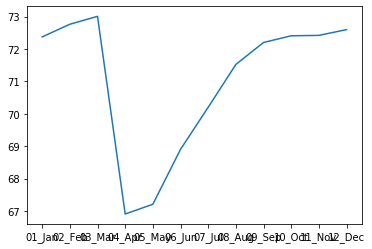

<Figure size 432x288 with 0 Axes>

In [125]:
# Plot weighted average monthly price over year - IGNORE AS LOGICALLY REFLECTS MAR HIGHEST, APR LOWEST
lists = sorted(mth_avg_weight.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()
plt.tight_layout()

In [149]:
# Fill empty cells with values from next period
data_ts_filled = data_ts.copy()
data_ts_filled.drop("2020-03", axis=1, inplace=True)
for i, col in enumerate(data_ts_filled.columns):
    if i > 0:
        data_ts_filled[col] = data_ts_filled[col].fillna(data_ts_filled[data_ts_filled.columns[i-1]])
data_ts_filled.head()

,2020-02,2020-01,2019-12,2019-11,2019-10,2019-09,2019-08,2019-07,2019-06,2019-05,2019-04,2019-03,2019-02,2019-01,2018-12,2018-11,2018-10,2018-09,2018-08,2018-07,2018-06,2018-05,2018-04
id,,,,,,,,,,,,,,,,,,,,,,,
3176,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0
3309,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0,26.0
6883,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0,125.0
7071,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,34.0,42.0,42.0,42.0,42.0,47.0,47.0,47.0,47.0,47.0,40.0
9991,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0


In [151]:
# Calculate weighted average price
#weight = 0.4
#price_avg = []
#for 
data["price_avg"] = data_ts_filled.iloc[:,0]*0.5 + data_ts_filled.iloc[:,7]*0.25 + data_ts_filled.iloc[:,15]*0.15 + data_ts_filled.iloc[:,22]*0.10 

In [152]:
data["price_diff"] = data.price - data.price_avg

In [172]:
data["price_diff_perc"] = data.price_diff / data.price

In [153]:
data[data.index==42343281]

,last_scraped,name,summary,space,description,experiences_offered,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_avg,price_diff
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42343281,2020-02-18,"Quiet, sunny Berlin Altbau with high ceilings",2-room apartment in one of Berlin's nicest are...,The apartment is in an old building - Altbau -...,2-room apartment in one of Berlin's nicest are...,none,NaN,955278,2011-08-11,"Berlin, Berlin, Germany",NaN,NaN,f,0.0,t,f,Kreuzberg,Berlin,52.49411,13.4205,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Heating,Washer,Dryer,Essentials,...",80.0,NaN,$15.00,1,$0.00,2,28,t,24,0,0,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,strict_14_with_grace_period,f,f,1,NaN,80.0,0.0


In [186]:
data_ts[data_ts.index==36609709]

,2020-03,2020-02,2020-01,2019-12,2019-11,2019-10,2019-09,2019-08,2019-07,2019-06,2019-05,2019-04,2019-03,2019-02,2019-01,2018-12,2018-11,2018-10,2018-09,2018-08,2018-07,2018-06,2018-05,2018-04
id,,,,,,,,,,,,,,,,,,,,,,,,
36609709,150.0,350.0,72.0,77.0,77.0,77.0,77.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
data_ts_filled[data_ts_filled.index==36609709]

,2020-02,2020-01,2019-12,2019-11,2019-10,2019-09,2019-08,2019-07,2019-06,2019-05,2019-04,2019-03,2019-02,2019-01,2018-12,2018-11,2018-10,2018-09,2018-08,2018-07,2018-06,2018-05,2018-04
id,,,,,,,,,,,,,,,,,,,,,,,
36609709,350.0,72.0,77.0,77.0,77.0,77.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [183]:
data[data.price_diff_perc>0.33]

,last_scraped,name,summary,space,description,experiences_offered,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,market,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_avg,price_diff,price_diff_perc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
593920,2020-02-18,"1,5 rooms in wonderful Kreuzberg","A cosy, artsy apartment, centrally located, fo...","A little jewel of an apartment, open kitchen/l...","A cosy, artsy apartment, centrally located, fo...",none,No smoking please and try to water my plants.,2933298,2012-07-14,"Berlin, Berlin, Germany",NaN,NaN,f,1.0,t,f,Kreuzberg,Berlin,52.49517,13.40122,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",179.0,$0.00,$5.00,1,$0.00,1,1125,t,0,4,0,10.0,10.0,9.0,10.0,10.0,10.0,t,f,f,strict_14_with_grace_period,f,f,1,0.06,107.00,72.00,0.402235
1564806,2020-02-18,"6-Bed mixed dorm ,Shared Bathroom 3","with 12-man communal shared bathroom, TV, WIFI...",The Singer 109 Hostel is located in the heart ...,"with 12-man communal shared bathroom, TV, WIFI...",none,- check out before 10:00 am. - no smoking in t...,8250486,2013-08-19,"Berlin, Berlin, Germany",within an hour,100%,f,49.0,t,f,Mitte,Berlin,52.51614,13.42485,t,Hostel,Shared room,6,1.5,1.0,0.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",150.0,$0.00,$0.00,1,$23.00,1,14,t,77,170,19,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,strict_14_with_grace_period,f,f,49,2.71,85.00,65.00,0.433333
1564917,2020-02-18,"4-Bedroom mixed, Ensuite , TV No. 1","with bathroom, TV, WIFI, bed linen, and storag...",The Singer 109 Hostel is located in the heart ...,"with bathroom, TV, WIFI, bed linen, and storag...",none,- Check out before 10:00 a.m. - No smoking in ...,8250486,2013-08-19,"Berlin, Berlin, Germany",within an hour,100%,f,49.0,t,f,Mitte,Berlin,52.51767,13.42518,t,Hostel,Shared room,4,1.5,1.0,0.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",99.0,$0.00,$0.00,1,$29.00,1,14,t,85,198,46,10.0,10.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,f,f,49,2.98,66.00,33.00,0.333333
1565012,2020-02-18,"6-Bedroom mixed, Ensuite , TV No. 1","with en-suite bathroom, TV, WIFI, bed linen, a...",The Singer 109 Hostel is located in the heart ...,"with en-suite bathroom, TV, WIFI, bed linen, a...",none,- check out before 10:00 am. - no smoking in t...,8250486,2013-08-19,"Berlin, Berlin, Germany",within an hour,100%,f,49.0,t,f,Mitte,Berlin,52.51756,13.42441,t,Hostel,Shared room,6,1.5,1.0,0.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",150.0,$0.00,$0.00,1,$27.00,1,14,t,86,119,18,10.0,9.0,10.0,10.0,9.0,9.0,t,f,f,strict_14_with_grace_period,f,f,49,1.67,87.50,62.50,0.416667
1565047,2020-02-18,"8-bed dorm mixed Ensuite ,Kitchen 1","with en-suite bathroom, TV, WIFI, bed linen, a...",The Singer 109 Hostel is located in the heart ...,"with en-suite bathroom, TV, WIFI, bed linen, a...",none,- check out before 11:00 am. - no smoking in t...,8250486,2013-08-19,"Berlin, Berlin, Germany",within an hour,100%,f,49.0,t,f,Mitte,Berlin,52.51778,13.42640,t,Hostel,Shared room,8,1.0,1.0,0.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Elevator,Heating,""Fa...",150.0,$0.00,$0.00,1,$23.00,1,14,t,76,115,17,9.0,9.0,10.0,9.0,9.0,9.0,t,f,f,strict_14_with_grace_period,f,f,49,1.57,91.00,59.00,0.393333


In [156]:
data.price_diff

id
3176        0.00
3309        0.50
6883        0.00
7071       -2.05
9991        0.00
14325       0.00
16644       0.00
17904       0.00
20858       0.00
21869       0.00
22415       0.00
22677       0.00
23834       0.00
24569       0.00
25653       0.00
            ... 
42348198    0.00
42348878    0.00
42350020    0.00
42350044    0.00
42350218    0.00
42350581    0.00
42351039    0.00
42352531    0.00
42355895    0.00
42356303    0.00
42356908    0.00
42358342    0.00
42358662    0.00
42359709    0.00
42361801    0.00
Name: price_diff, Length: 25197, dtype: float64

**Export data_engineered**

In [5]:
data.to_csv(r'data_engineered.csv', index = False)